In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
dirList = os.listdir("data/WPI/")
fList = []
for filename in dirList: #limit to .csv
    if(filename[-4:] == '.csv'):
        fList.append(filename[:-4]) 

In [3]:
frames = []
for fName in fList[:]:
    fContent = pd.read_csv('data/WPI/'+fName+'.csv', header=None)
    fContent.columns = ['ContestId', 'MinutesRemaining', 'Entries']
    #remove duplicate ids
    fIds = fContent.ContestId.unique()
    frames.append(pd.DataFrame(data={'fileName':fName, 'ContestId':fIds}))
frame = pd.concat(frames)

In [4]:
len(frame)

479405

### Merging Time Series Location With Contest Data
There are 479,405 contest IDs in the time series data, and
I think it'll make it much easier to work through

In [5]:
contestsPre = pd.read_csv('data/Contests.csv')
contestsPost = pd.merge(contestsPre, frame, on="ContestId")
contestsPost.to_csv('data/ContestsWithPaths.csv')

### Graphing Distribution of ids across files

In [8]:
print(frame['ContestId'].min(), frame['ContestId'].max())

7962690 58300710


fileName
2015-09    AxesSubplot(0.125,0.125;0.775x0.755)
2015-10    AxesSubplot(0.125,0.125;0.775x0.755)
2015-11    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01    AxesSubplot(0.125,0.125;0.775x0.755)
2016-02    AxesSubplot(0.125,0.125;0.775x0.755)
2016-03    AxesSubplot(0.125,0.125;0.775x0.755)
2016-04    AxesSubplot(0.125,0.125;0.775x0.755)
2016-05    AxesSubplot(0.125,0.125;0.775x0.755)
2016-06    AxesSubplot(0.125,0.125;0.775x0.755)
2016-07    AxesSubplot(0.125,0.125;0.775x0.755)
2016-08    AxesSubplot(0.125,0.125;0.775x0.755)
2016-09    AxesSubplot(0.125,0.125;0.775x0.755)
2016-10    AxesSubplot(0.125,0.125;0.775x0.755)
2016-11    AxesSubplot(0.125,0.125;0.775x0.755)
2016-12    AxesSubplot(0.125,0.125;0.775x0.755)
2017-01    AxesSubplot(0.125,0.125;0.775x0.755)
2017-02    AxesSubplot(0.125,0.125;0.775x0.755)
2017-03    AxesSubplot(0.125,0.125;0.775x0.755)
2017-04    AxesSubplot(0.125,0.125;0.775x0.755)
2017-05    AxesSubplot(0.125,0.

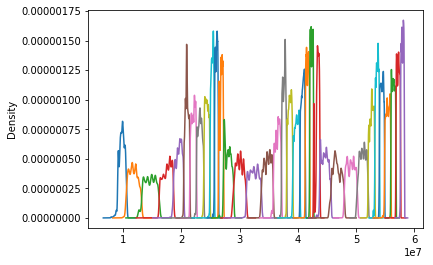

In [28]:
fig, ax = plt.subplots()
frame.groupby('fileName').plot(ax = ax, x='fileName', y='ContestId', kind='kde', label='fileName', legend=None)

I 